In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.linalg
import seaborn as sns

In [3]:
# generate data
M = 10000
xy = np.random.multivariate_normal([0.,0.], [[1.,0.],[0.,1.0]], M)
xy = xy[np.argsort(xy[:,0])]
x, y = xy[:,0], xy[:,1]
X = x
fnT = lambda x: 1 + x + x**2
#fnT = lambda x: 1 + x
Y = y + fnT(x)

# conditional expectation estimate using lowess
XY_s = sm.nonparametric.lowess(Y,X, frac=0.1)

In [119]:
# linear projections (basically, linear regression)
Xm = np.reshape(X, (-1,1))
# 1. without constant
model_woc = sm.OLS(Y,Xm)
model_woc_res = model_woc.fit()
Y_lpwoc = model_woc_res.predict(Xm)
# 2. with constant
Xwc = sm.add_constant(Xm)
model_wc = sm.OLS(Y,Xwc)
model_wc_res = model_wc.fit()
Y_lpwc = model_wc_res.predict(Xwc)

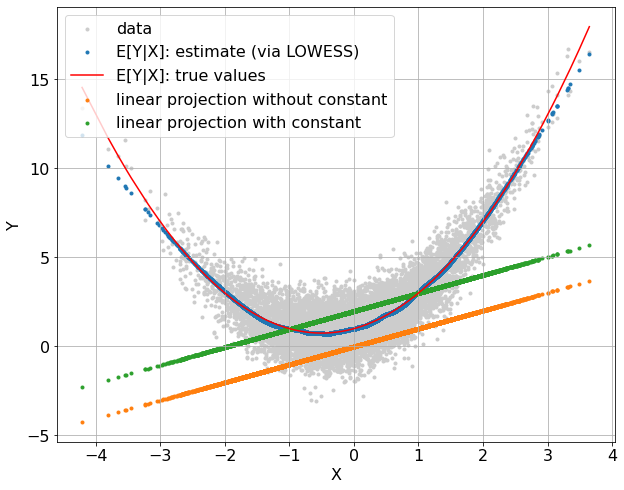

In [120]:
# plot
plt.rcParams['font.size'] = '16'
plt.figure(figsize=(10,8))
plt.scatter(X, Y, marker='.', color = 0.8 * np.ones(3), label='data')
plt.scatter(XY_s[:,0], XY_s[:,1], marker='.', label='E[Y|X]: estimate (via LOWESS)')
plt.plot(X, fnT(X), 'r', label='E[Y|X]: true values')
plt.scatter(X, Y_lpwoc, marker='.', label='linear projection without constant')
plt.scatter(X, Y_lpwc, marker='.', label = 'linear projection with constant')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc=2)
plt.grid()
plt.show()

# Triangular Factorisation

In [217]:
N = 10
V = np.diag(np.ones(N)) + 0.8 * np.ones((N,N))

In [218]:
lu, d, perm = scipy.linalg.ldl(V)

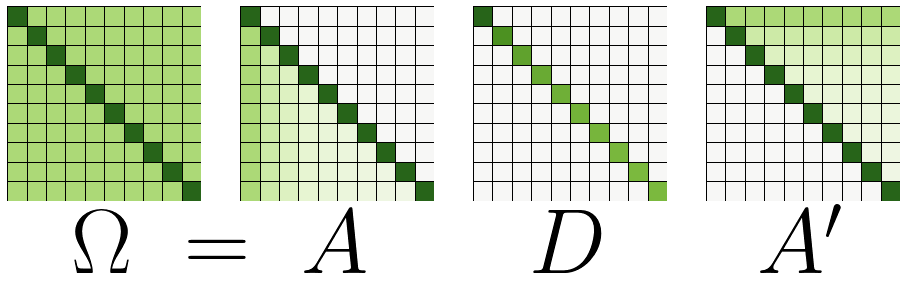

In [269]:
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(16, 4))
plt.subplot(1,4,1)
sns.heatmap(V, center=0, cmap='PiYG', cbar=False, xticklabels=[], yticklabels=[], square=True, linewidths=0.5, linecolor='k')
plt.text(5,12.5,r'$\Omega$', fontsize=92, horizontalalignment='center', verticalalignment='center')
plt.text(11,12.5,r'$=$', fontsize=92, horizontalalignment='center', verticalalignment='center')
plt.subplot(1,4,2)
sns.heatmap(lu, center=0, cmap='PiYG', cbar=False, xticklabels=[], yticklabels=[], square=True, linewidths=0.5, linecolor='k')
plt.text(5,12.5,r'$A$', fontsize=92, horizontalalignment='center', verticalalignment='center', zorder=10)
plt.subplot(1,4,3)
sns.heatmap(d, center=0, cmap='PiYG', cbar=False, xticklabels=[], yticklabels=[], square=True, linewidths=0.5, linecolor='k')
plt.text(5,12.5,r'$D$', fontsize=92, horizontalalignment='center', verticalalignment='center')
plt.subplot(1,4,4)
sns.heatmap(lu.T, center=0, cmap='PiYG', cbar=False, xticklabels=[], yticklabels=[], square=True, linewidths=0.5, linecolor='k')
plt.text(5,12.5,r'$A^\prime$', fontsize=92, horizontalalignment='center', verticalalignment='center')
plt.show()

In [59]:
Mu = np.array([0.0, 0.0])
Sigma = np.array([[2., 1.25], [1.25, 1.0]])
X = np.random.multivariate_normal(Mu, Sigma, 1000)

In [76]:
# Triangular
A, D, perm = scipy.linalg.ldl(Sigma)
# Cholesky
L = scipy.linalg.cholesky(Sigma, lower=True)
# diagonolisation
W, V = scipy.linalg.eigh(Sigma)
idx_W_s = np.argsort(W)[-1::-1]
W = W[idx_W_s]
V = V[:,idx_W_s]

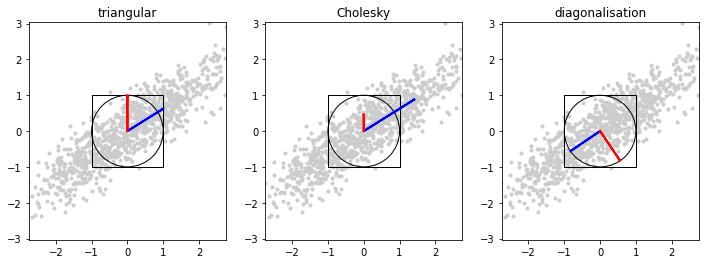

In [91]:
def plot_arrow(F):
    plt.arrow(0.0, 0.0, F[0,0], F[1,0], color='b', lw=2)
    plt.arrow(0.0, 0.0, F[0,1], F[1,1], color='r', lw=2)
    
def plot_data():
    plt.scatter(X[:,0], X[:,1], color =0.8 * np.ones(3), marker='.')
    c = plt.Circle((0,0), 1.0, facecolor='none', edgecolor='k')
    plt.gca().add_patch(c)
    s = plt.Rectangle((-1,-1), 2, 2, facecolor='none', edgecolor='k')
    plt.gca().add_patch(s)
    plt.axis('equal')
    xylim = 2.75
    plt.xlim([-xylim,xylim])
    plt.ylim([-xylim,xylim])

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plot_data()
plot_arrow(A)
plt.title('triangular')
plt.subplot(1,3,2)
plot_data()
plot_arrow(L)
plt.title('Cholesky')
plt.subplot(1,3,3)
plot_data()
plot_arrow(V)
plt.title('diagonalisation')
plt.show()